In [125]:
import pandas as pd
import numpy as np
pd.pandas.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv('heart_disease.csv')

In [127]:
df.shape

(303, 14)

## missing data

In [128]:
missing = [i for i in df.columns if df[i].isnull().sum()>0]

In [129]:
missing
# no column has missing values

[]

In [130]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Meta-data

In [132]:
# 9 cp: chest pain type
#-- Value 1: typical angina
#-- Value 2: atypical angina
#-- Value 3: non-anginal pain
#-- Value 4: asymptomatic

# 10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)

# 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# 19 restecg: resting electrocardiographic results
#-- Value 0: normal
#-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

# 32 thalach: maximum heart rate achieved

# 38 exang: exercise induced angina (1 = yes; 0 = no)

# 44 ca: number of major vessels (0-3) colored by flourosopy

# 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# 58 num: diagnosis of heart disease (angiographic disease status)
#-- Value 0: < 50% diameter narrowing
#-- Value 1: > 50% diameter narrowing
#(in any major vessel: attributes 59 through 68 are vessels)

## Exploratory data analysis

### Numerical columns

In [133]:
num_cols = ['age', 'trestbps', 'chol', 'thalach','oldpeak']

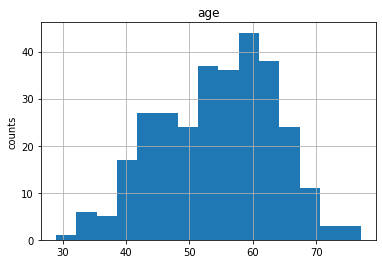

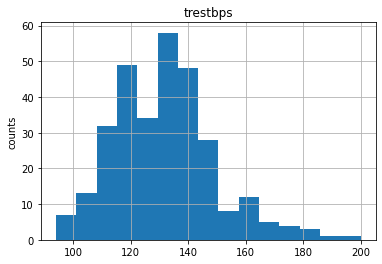

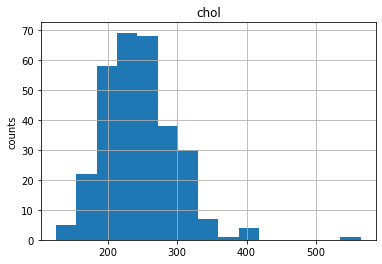

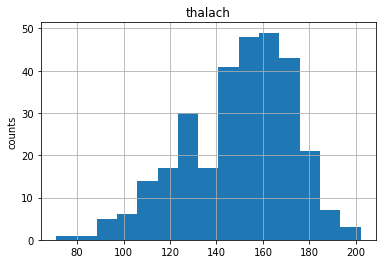

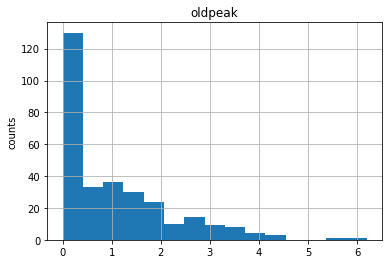

In [134]:
def analyze_num_cols(var, df):
    fig, ax = plt.subplots()
    df[var].hist(bins=15)
    ax.set_title(var)
    ax.set_ylabel('counts')

for var in num_cols:
    analyze_num_cols(var, df)

<AxesSubplot:>

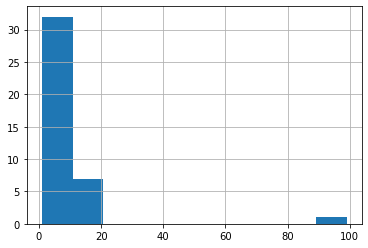

In [135]:
df.oldpeak.value_counts().hist()

In [136]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

### Outliers

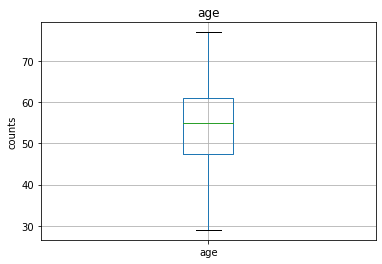

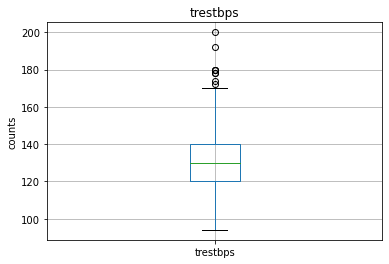

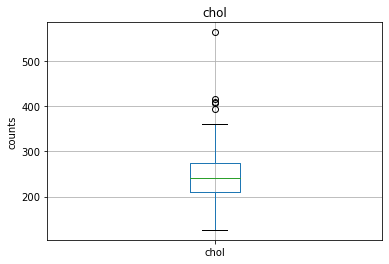

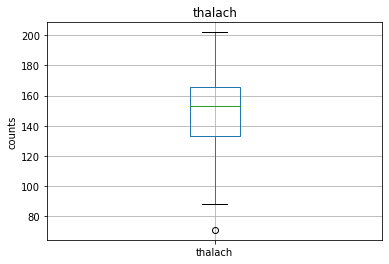

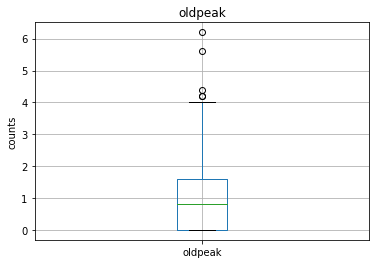

In [137]:
def find_outliers(var, df):
    fig,ax = plt.subplots()
    df.boxplot(column=var)
    ax.set_title(var)
    ax.set_ylabel('counts')
for var in num_cols:
    find_outliers(var, df)

### Categorical columns

In [138]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

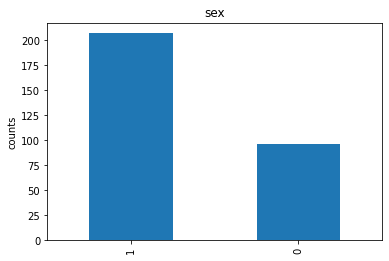

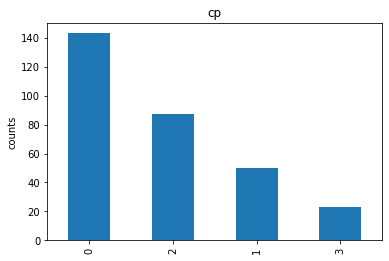

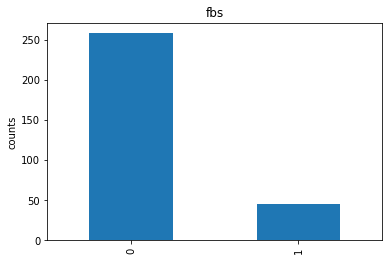

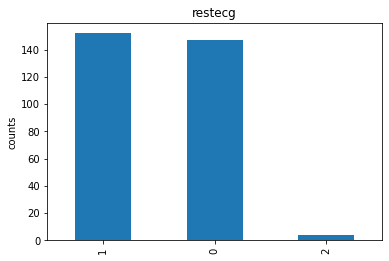

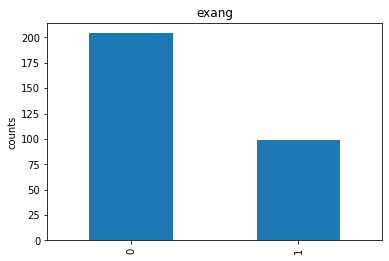

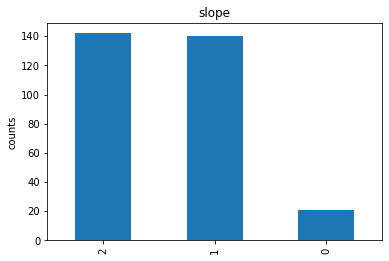

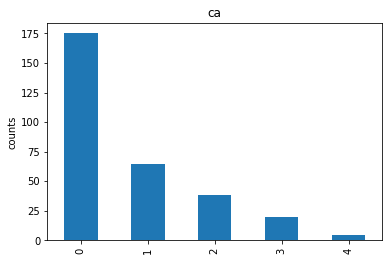

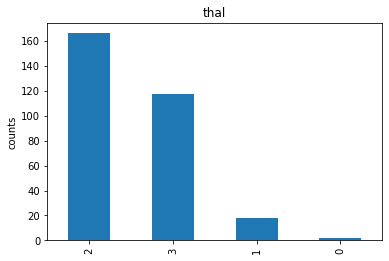

In [139]:
def cat_cols_counts(var, df):
    fig,ax = plt.subplots()
    df[var].value_counts().plot.bar()
    ax.set_title(var)
    ax.set_ylabel('counts')

for var in cat_cols:
    cat_cols_counts(var, df)

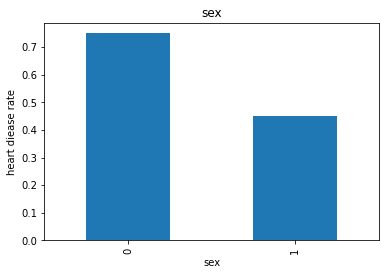

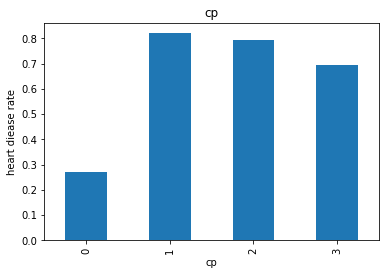

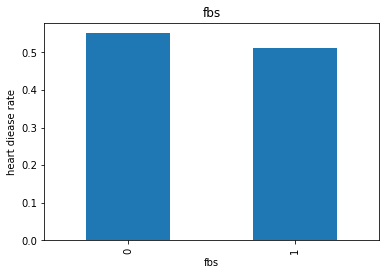

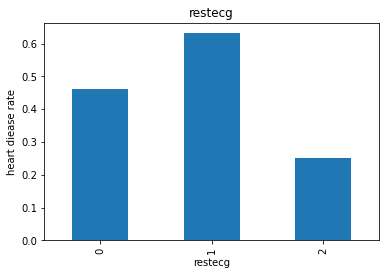

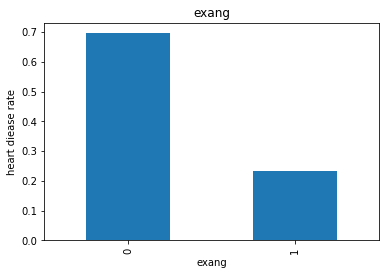

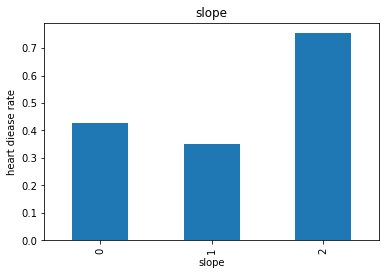

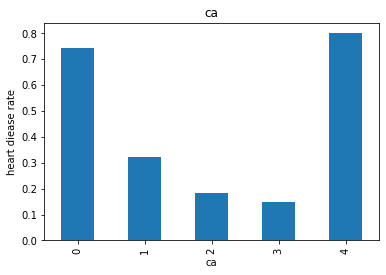

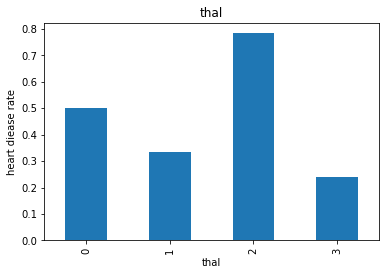

In [140]:
def analyze_cat_cols(var, df):
    df.groupby(var)['target'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('heart diease rate')
    plt.show()

for var in cat_cols:
    analyze_cat_cols(var, df)

### Detect rare labels

In [141]:
def rare_labels(var, df, rare_perc):
    tmp = df.groupby(var)['target'].count()/len(df)
    return tmp[tmp<rare_perc]
for var in cat_cols:
    print(rare_labels(var, df, 0.01))
    print()

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

thal
0    0.006601
Name: target, dtype: float64



In [142]:
df.thal.value_counts()
# 0 in thal is a rare label with only o.66% existence in this column

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

## Feature engineering

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [144]:
# split the data first before engoneering
X = df.copy()
y = df['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)  

### Handling rare labels

In [145]:
# from the above analysis, we know that "thal" has a rare label "0"
# Examine the meta-data, it didn't say what 0 means in "thal" column, so I'll just drop it.
X_train[X_train['thal']==0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [146]:
X_test[X_test['thal']==0]
# All the rare labels are in the training set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [147]:
rare_index = X_train[X_train['thal']==0].index

In [148]:
X_train.drop(index=rare_index, inplace=True)

D:\Udemy\envs\my_env\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [149]:
X_train.shape

(270, 14)

### Encoding categorical columns

In [150]:
# use ordered-integer encoding
ordinal_cols = ['thal', 'ca', 'slope', 'restecg']
# use one hot encoding
onehot_cols = ['cp']

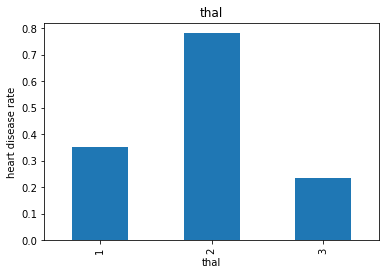

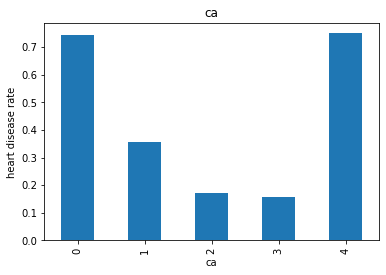

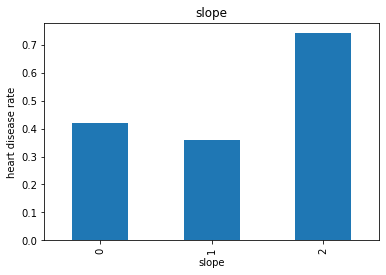

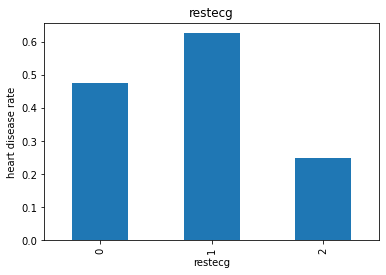

In [151]:
# ordered-integer encoding for ['thal', 'ca', 'slope'] 
for var in ordinal_cols:
    fig,ax = plt.subplots()
    X_train.groupby(var)['target'].mean().plot.bar()
    ax.set_title(var)
    ax.set_ylabel('heart disease rate');

In [152]:
# order the categories accoding to their relation with target
def repalce_category(train, test, var, target): 
    label_order = train.groupby(var)[target].mean().sort_values().index
    ordinal_mapping = {k:i for i,k in enumerate(label_order)}
    train[var] = train[var].map(ordinal_mapping)
    test[var] = test[var].map(ordinal_mapping)
    
for var in ordinal_cols:
    repalce_category(X_train, X_test, var, 'target')

<ipython-input-152-abdc21275fd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[var] = train[var].map(ordinal_mapping)
<ipython-input-152-abdc21275fd1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[var] = test[var].map(ordinal_mapping)


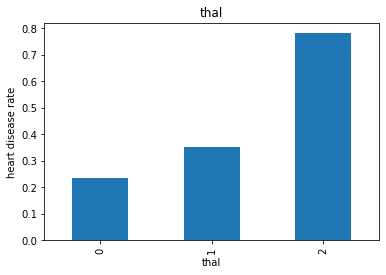

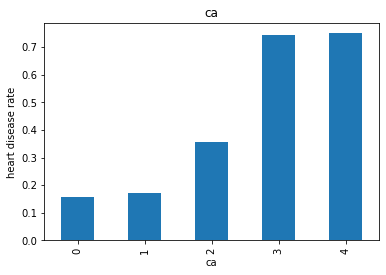

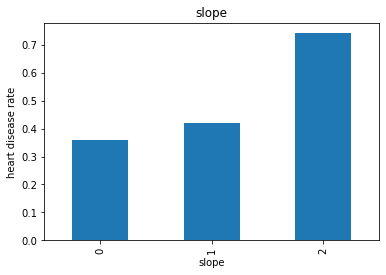

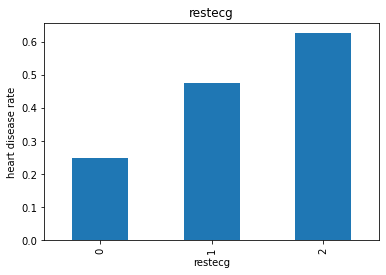

In [153]:
for var in ordinal_cols:
    fig,ax = plt.subplots()
    X_train.groupby(var)['target'].mean().plot.bar()
    ax.set_title(var)
    ax.set_ylabel('heart disease rate');

In [154]:
# One hot encoding for cp'
onehot_cp=pd.get_dummies(X_train['cp'], drop_first=True, prefix='cp')

In [155]:
X_train = pd.concat([X_train, onehot_cp], axis=1)

In [156]:
X_train.drop('cp', axis=1, inplace=True)

In [157]:
X_train.shape

(270, 16)

In [158]:
onehot_cp=pd.get_dummies(X_test['cp'], drop_first=True, prefix='cp')
X_test = pd.concat([X_test, onehot_cp], axis=1)
X_test.drop('cp', axis=1, inplace=True)
X_test.shape

(31, 16)

In [159]:
X_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3
13,64,1,110,211,0,1,144,1,1.8,0,3,2,1,0,0,1
176,60,1,117,230,1,2,160,1,1.4,2,1,0,0,0,0,0
171,48,1,110,229,0,2,168,0,1.0,1,3,0,0,1,0,0
128,52,0,136,196,0,1,169,0,0.1,0,3,2,1,0,1,0
119,46,0,138,243,0,1,152,1,0.0,0,3,2,1,0,0,0


In [160]:
y_train = X_train['target']

In [161]:
y_test = X_test['target']

In [162]:
mapper = {1:'Heart disease', 0:'Healthy'}
y_train = y_train.map(mapper)
y_test = y_test.map(mapper)

In [163]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [164]:
X_train.drop('target', axis=1, inplace=True)

In [165]:
X_test.drop('target', axis=1, inplace=True)

In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [167]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [168]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns)

In [169]:
scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_test.columns)

## Building model

In [170]:
X_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1,cp_2,cp_3
13,64,1,110,211,0,1,144,1,1.8,0,3,2,0,0,1
176,60,1,117,230,1,2,160,1,1.4,2,1,0,0,0,0
171,48,1,110,229,0,2,168,0,1.0,1,3,0,1,0,0
128,52,0,136,196,0,1,169,0,0.1,0,3,2,0,1,0
119,46,0,138,243,0,1,152,1,0.0,0,3,2,0,0,0


In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [172]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=[15,]))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [173]:
from tensorflow.keras.callbacks import EarlyStopping

In [174]:
early_stop=EarlyStopping(patience=10)


In [175]:
model.fit(x=scaled_X_train, y=y_train, verbose=1, epochs= 300, 
          validation_data=(scaled_X_test, y_test),callbacks=[early_stop])

Epoch 1/300
9/9 [==============================] - 0s 36ms/step - loss: 0.7685 - accuracy: 0.4481 - val_loss: 0.7543 - val_accuracy: 0.4839
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7480 - accuracy: 0.4481 - val_loss: 0.7339 - val_accuracy: 0.4516
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 0.7273 - accuracy: 0.4778 - val_loss: 0.7180 - val_accuracy: 0.5161
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7110 - accuracy: 0.5148 - val_loss: 0.7039 - val_accuracy: 0.4839
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 0.6974 - accuracy: 0.5370 - val_loss: 0.6911 - val_accuracy: 0.5806
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5889 - val_loss: 0.6795 - val_accuracy: 0.6452
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6727 - accuracy: 0.6333 - val_loss: 0.6676 - val_accuracy: 0.6452
Epoch 8/300
9/9 [=========

9/9 [==============================] - 0s 5ms/step - loss: 0.3862 - accuracy: 0.8296 - val_loss: 0.3176 - val_accuracy: 0.8710
Epoch 60/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3846 - accuracy: 0.8296 - val_loss: 0.3169 - val_accuracy: 0.8710
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3839 - accuracy: 0.8296 - val_loss: 0.3145 - val_accuracy: 0.8710
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8296 - val_loss: 0.3147 - val_accuracy: 0.8710
Epoch 63/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3813 - accuracy: 0.8222 - val_loss: 0.3138 - val_accuracy: 0.8710
Epoch 64/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3806 - accuracy: 0.8296 - val_loss: 0.3103 - val_accuracy: 0.8710
Epoch 65/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3793 - accuracy: 0.8296 - val_loss: 0.3097 - val_accuracy: 0.8710
Epoch 66/300
9/9 [===============

9/9 [==============================] - 0s 5ms/step - loss: 0.3493 - accuracy: 0.8444 - val_loss: 0.2685 - val_accuracy: 0.8710
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3489 - accuracy: 0.8444 - val_loss: 0.2689 - val_accuracy: 0.8710
Epoch 119/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3485 - accuracy: 0.8444 - val_loss: 0.2696 - val_accuracy: 0.8710
Epoch 120/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3484 - accuracy: 0.8481 - val_loss: 0.2711 - val_accuracy: 0.8710
Epoch 121/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3480 - accuracy: 0.8481 - val_loss: 0.2711 - val_accuracy: 0.8710
Epoch 122/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3479 - accuracy: 0.8481 - val_loss: 0.2693 - val_accuracy: 0.8710
Epoch 123/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.8481 - val_loss: 0.2685 - val_accuracy: 0.8710
Epoch 124/300
9/9 [========

9/9 [==============================] - 0s 5ms/step - loss: 0.3351 - accuracy: 0.8481 - val_loss: 0.2515 - val_accuracy: 0.9032
Epoch 176/300
9/9 [==============================] - 0s 7ms/step - loss: 0.3353 - accuracy: 0.8481 - val_loss: 0.2530 - val_accuracy: 0.9032
Epoch 177/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3351 - accuracy: 0.8519 - val_loss: 0.2519 - val_accuracy: 0.9032
Epoch 178/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3349 - accuracy: 0.8556 - val_loss: 0.2529 - val_accuracy: 0.9032
Epoch 179/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3346 - accuracy: 0.8556 - val_loss: 0.2521 - val_accuracy: 0.9032
Epoch 180/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.8481 - val_loss: 0.2511 - val_accuracy: 0.9032
Epoch 181/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3345 - accuracy: 0.8481 - val_loss: 0.2513 - val_accuracy: 0.9032
Epoch 182/300
9/9 [========

In [176]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

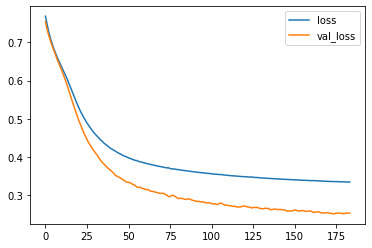

In [177]:
metrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

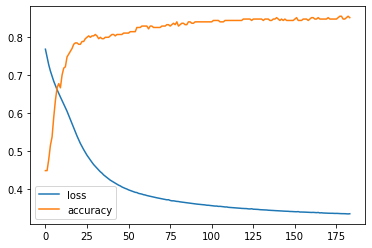

In [178]:
metrics[['loss', 'accuracy']].plot()

In [179]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.768544,0.448148,0.754288,0.483871
1,0.748039,0.448148,0.733881,0.451613
2,0.727286,0.477778,0.717985,0.516129
3,0.710985,0.514815,0.703946,0.483871
4,0.697412,0.537037,0.691139,0.580645
...,...,...,...,...
179,0.334637,0.848148,0.251102,0.903226
180,0.334481,0.848148,0.251273,0.903226
181,0.334327,0.851852,0.253207,0.903226
182,0.333885,0.855556,0.252223,0.903226


In [180]:
model.evaluate(scaled_X_test, y_test)

1/1 [==============================] - 0s 3ms/step - loss: 0.2529 - accuracy: 0.9032


[0.2529090940952301, 0.9032257795333862]

In [181]:
pred = model.predict(scaled_X_test)
pred[:3]

array([[0.01493752],
       [0.8358974 ],
       [0.79739654]], dtype=float32)

In [182]:
encoder.classes_

array(['Healthy', 'Heart disease'], dtype='<U13')

## Save the model

In [183]:
model.save("heart_disease_model.h5")

In [184]:
import joblib

In [185]:
joblib.dump(scaler, 'heart_disease_scaler.pkl')

['heart_disease_scaler.pkl']

## Test and predict

In [211]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
51,66,1,0,120,302,0,0,151,0,0.4,1,0,2,1
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0


In [212]:
from tensorflow.keras.models import load_model

In [213]:
heart_disease_model = load_model('heart_disease_model.h5')
heart_disease_scaler = joblib.load('heart_disease_scaler.pkl')

In [214]:
test_instance = {'age': 38, 'sex': 1, 'trestbps':133, 'chol':290, 'fbs':0, 'restecg':1, 'thalach':150,
                 'exang':0, 'oldpeak':1.8, 'slope':1, 'ca':0, 'thal':3, 'cp_1':0, 'cp_2':0, 'cp_3':0}

In [218]:
def prediction(model, scaler, json):
    age = json['age']
    sex = json['sex']
    trestbps = json['trestbps']
    chol = json['chol']
    fbs = json['fbs']
    restecg = json['restecg']
    thalach = json['thalach']
    exang = json['exang']
    oldpeak = json['oldpeak']
    slope = json['oldpeak']
    ca = json['ca']
    thal = json['thal']
    cp_1 = json['cp_1']
    cp_2 = json['cp_2']
    cp_3 = json['cp_3']
    
    heart = [[age, sex, trestbps, chol, fbs, restecg, thalach,
       exang, oldpeak, slope, ca, thal, cp_1, cp_2, cp_3]]
    heart = scaler.transform(heart)

    classes = np.array(['Healthy', 'Heart disease'])
    classes_index = np.argmax(model.predict(heart), axis=-1)[0]
    
    return classes[classes_index]

In [219]:
prediction(heart_disease_model, heart_disease_scaler, test_instance)

'Healthy'